In [1]:
from diffusers import DDPMScheduler, DDPMPipeline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/tissot/DINO-Fusion/Diffusion_Model")
from utils import get_dataloader
import pickle

## Setup and Imports:

In [ ]:
def load_infos(path):
    with open(path, 'rb') as file:
        return pickle.load(file)

infos={}
for feature in ["soce","toce","ssh"]:
    infos[feature] = load_infos(f'/home/tissot/data/infos/{feature}_info.pkl')
    infos[feature]["mask"] = np.tile(infos[feature]["mask"],(16,1,1,1)).transpose(0,2,3,1)

In [ ]:
inferences = np.load("/home/tissot/diffModel_experiences/cb7xsahm/epoch_920.npy")  

In [18]:
ssh_inferred  = np.where(infos["ssh"]["mask"],  np.nan, inferences[:,4:-5,1:-1,-1:])
soce_inferred = np.where(infos["soce"]["mask"], np.nan, inferences[:,4:-5,1:-1,:18])
toce_inferred = np.where(infos["toce"]["mask"], np.nan, inferences[:,4:-5,1:-1,18:-1])

print(ssh_inferred.shape)
print(soce_inferred.shape)
print(toce_inferred.shape)

(16, 199, 62, 1)
(16, 199, 62, 18)
(16, 199, 62, 18)


/tmp/ipykernel_2487572/389837502.py:4: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


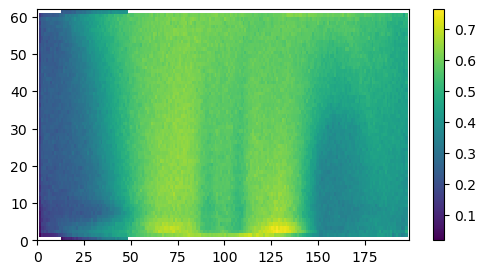

In [5]:
plt.figure(figsize=(6, 3))

plt.pcolor(ssh_inferred[0,:,:,0].T)
plt.colorbar()
plt.show()

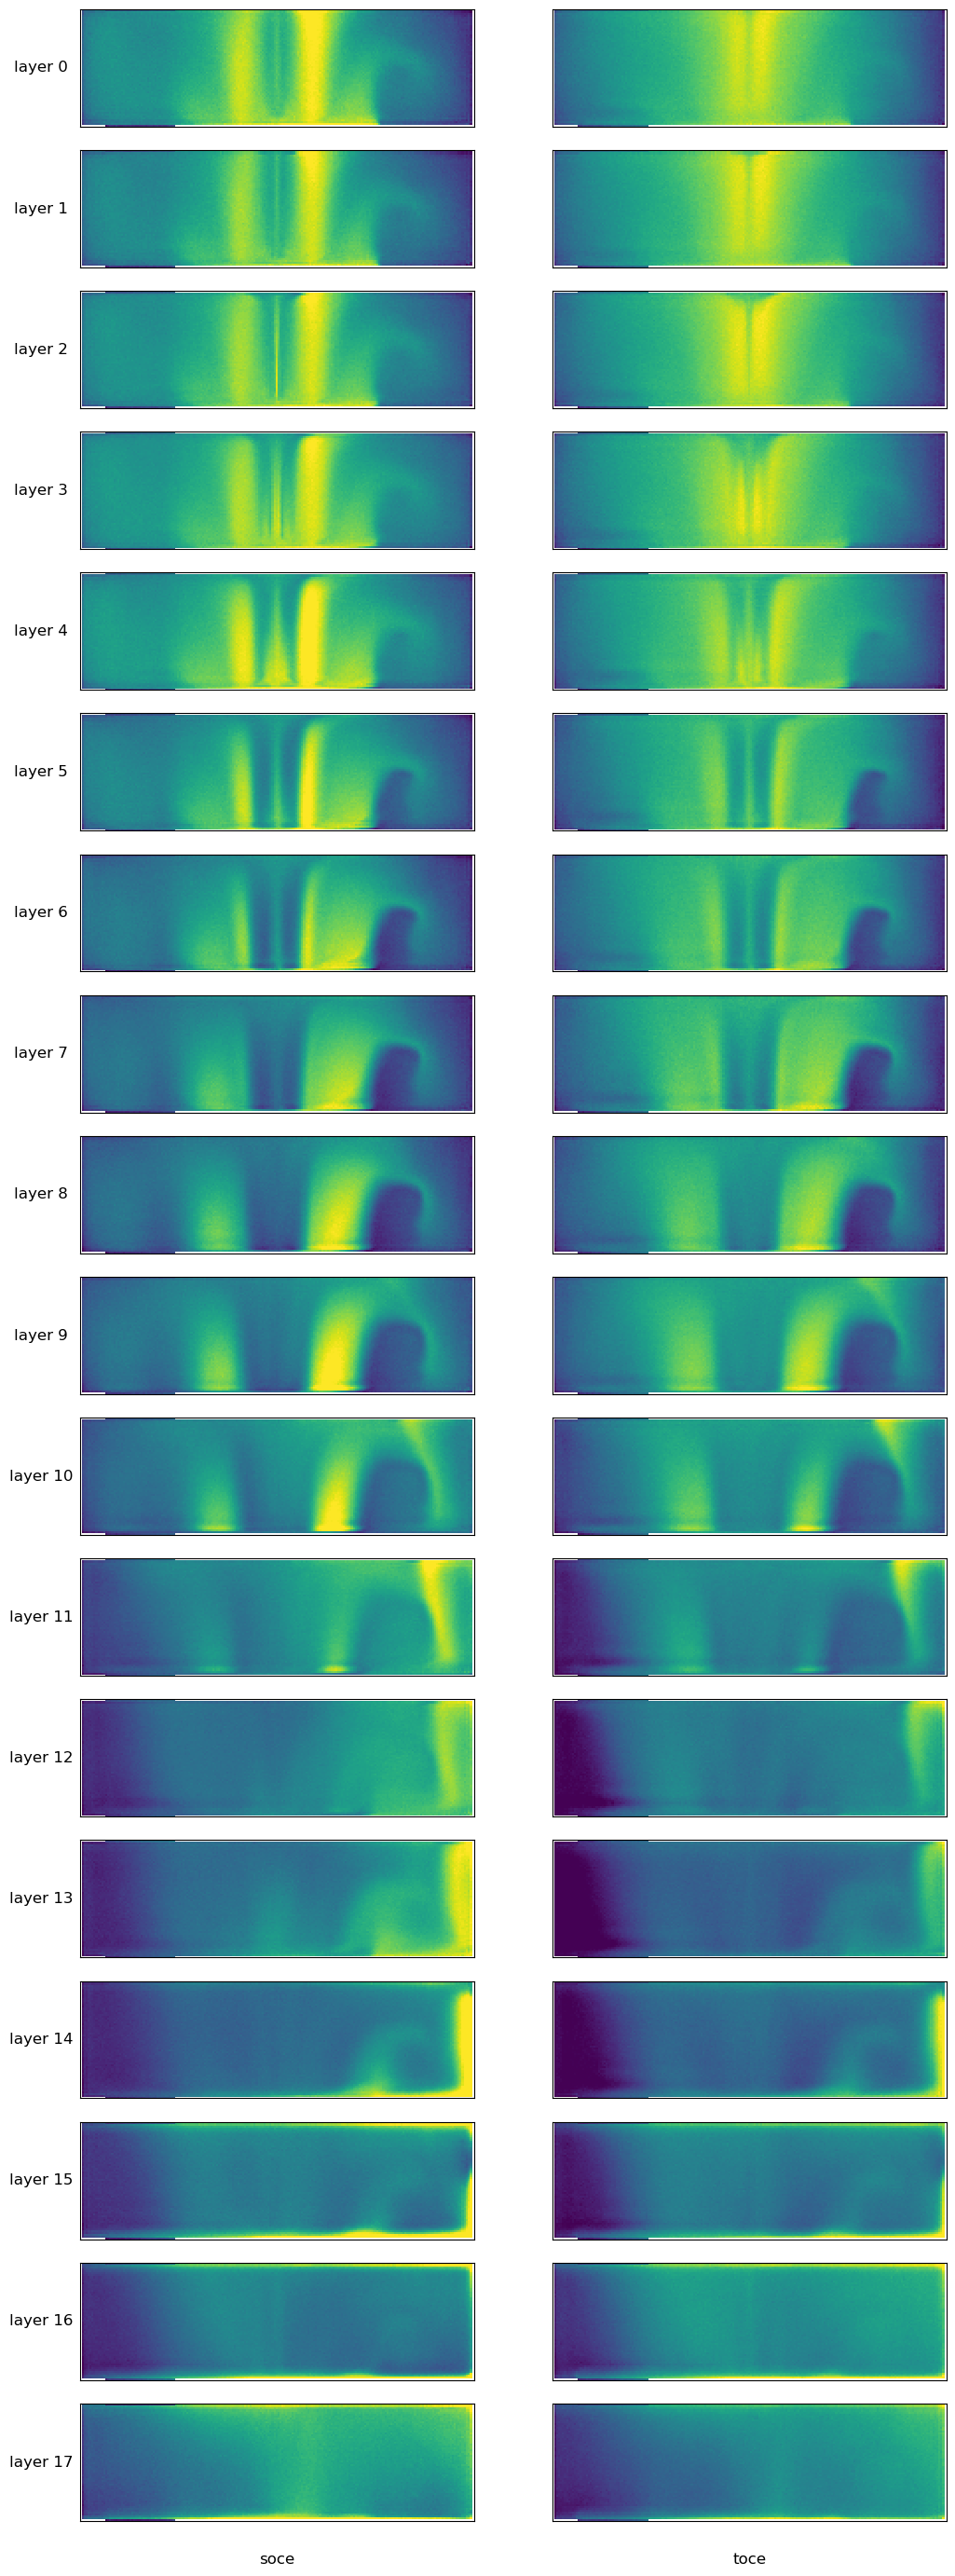

In [6]:
fig, axes = plt.subplots(18, 2, figsize=(12, 35))
var = [soce_inferred,toce_inferred]
column_titles = ['soce', 'toce']

for i in range(2):
    for j in range(18):
        axes[j,i].pcolor(var[i][0,:,:,j].T)
        axes[j, i].set_xticks([])
        axes[j, i].set_yticks([])
        if i == 0:
            axes[j, i].set_ylabel(f"layer {j}", rotation=0, size='large', labelpad=30, va='center')
        if j == 17:
            axes[j, i].set_xlabel(column_titles[i], rotation=0, size='large', labelpad=30, va='center')
plt.show()


## The Data


In [7]:
from configs.base_config import TrainingConfig
config = TrainingConfig()
train_dataloader = get_dataloader(config.data_file, batch_size=config.train_batch_size,step=2)
batch = next(iter(train_dataloader))


In [8]:
batch = np.array(batch).transpose(0,2,3,1)

ssh_truth  = np.where(infos["ssh"]["mask"], np.nan, np.array(batch[:,4:-5,1:-1,-1:]))
soce_truth = np.where(infos["soce"]["mask"], np.nan, np.array(batch[:,4:-5,1:-1,:18]))
toce_truth = np.where(infos["toce"]["mask"], np.nan, np.array(batch[:,4:-5,1:-1,18:-1]))

In [9]:
data_inf = np.concatenate((soce_inferred,toce_inferred,ssh_inferred),axis=3).T
data_inf = data_inf.reshape(37,-1)
print(data_inf.shape)

data_truth = np.concatenate((soce_truth,toce_truth,ssh_truth),axis=3).T
data_truth = data_truth.reshape(37,-1)
print(data_truth.shape)

(37, 197408)
(37, 197408)


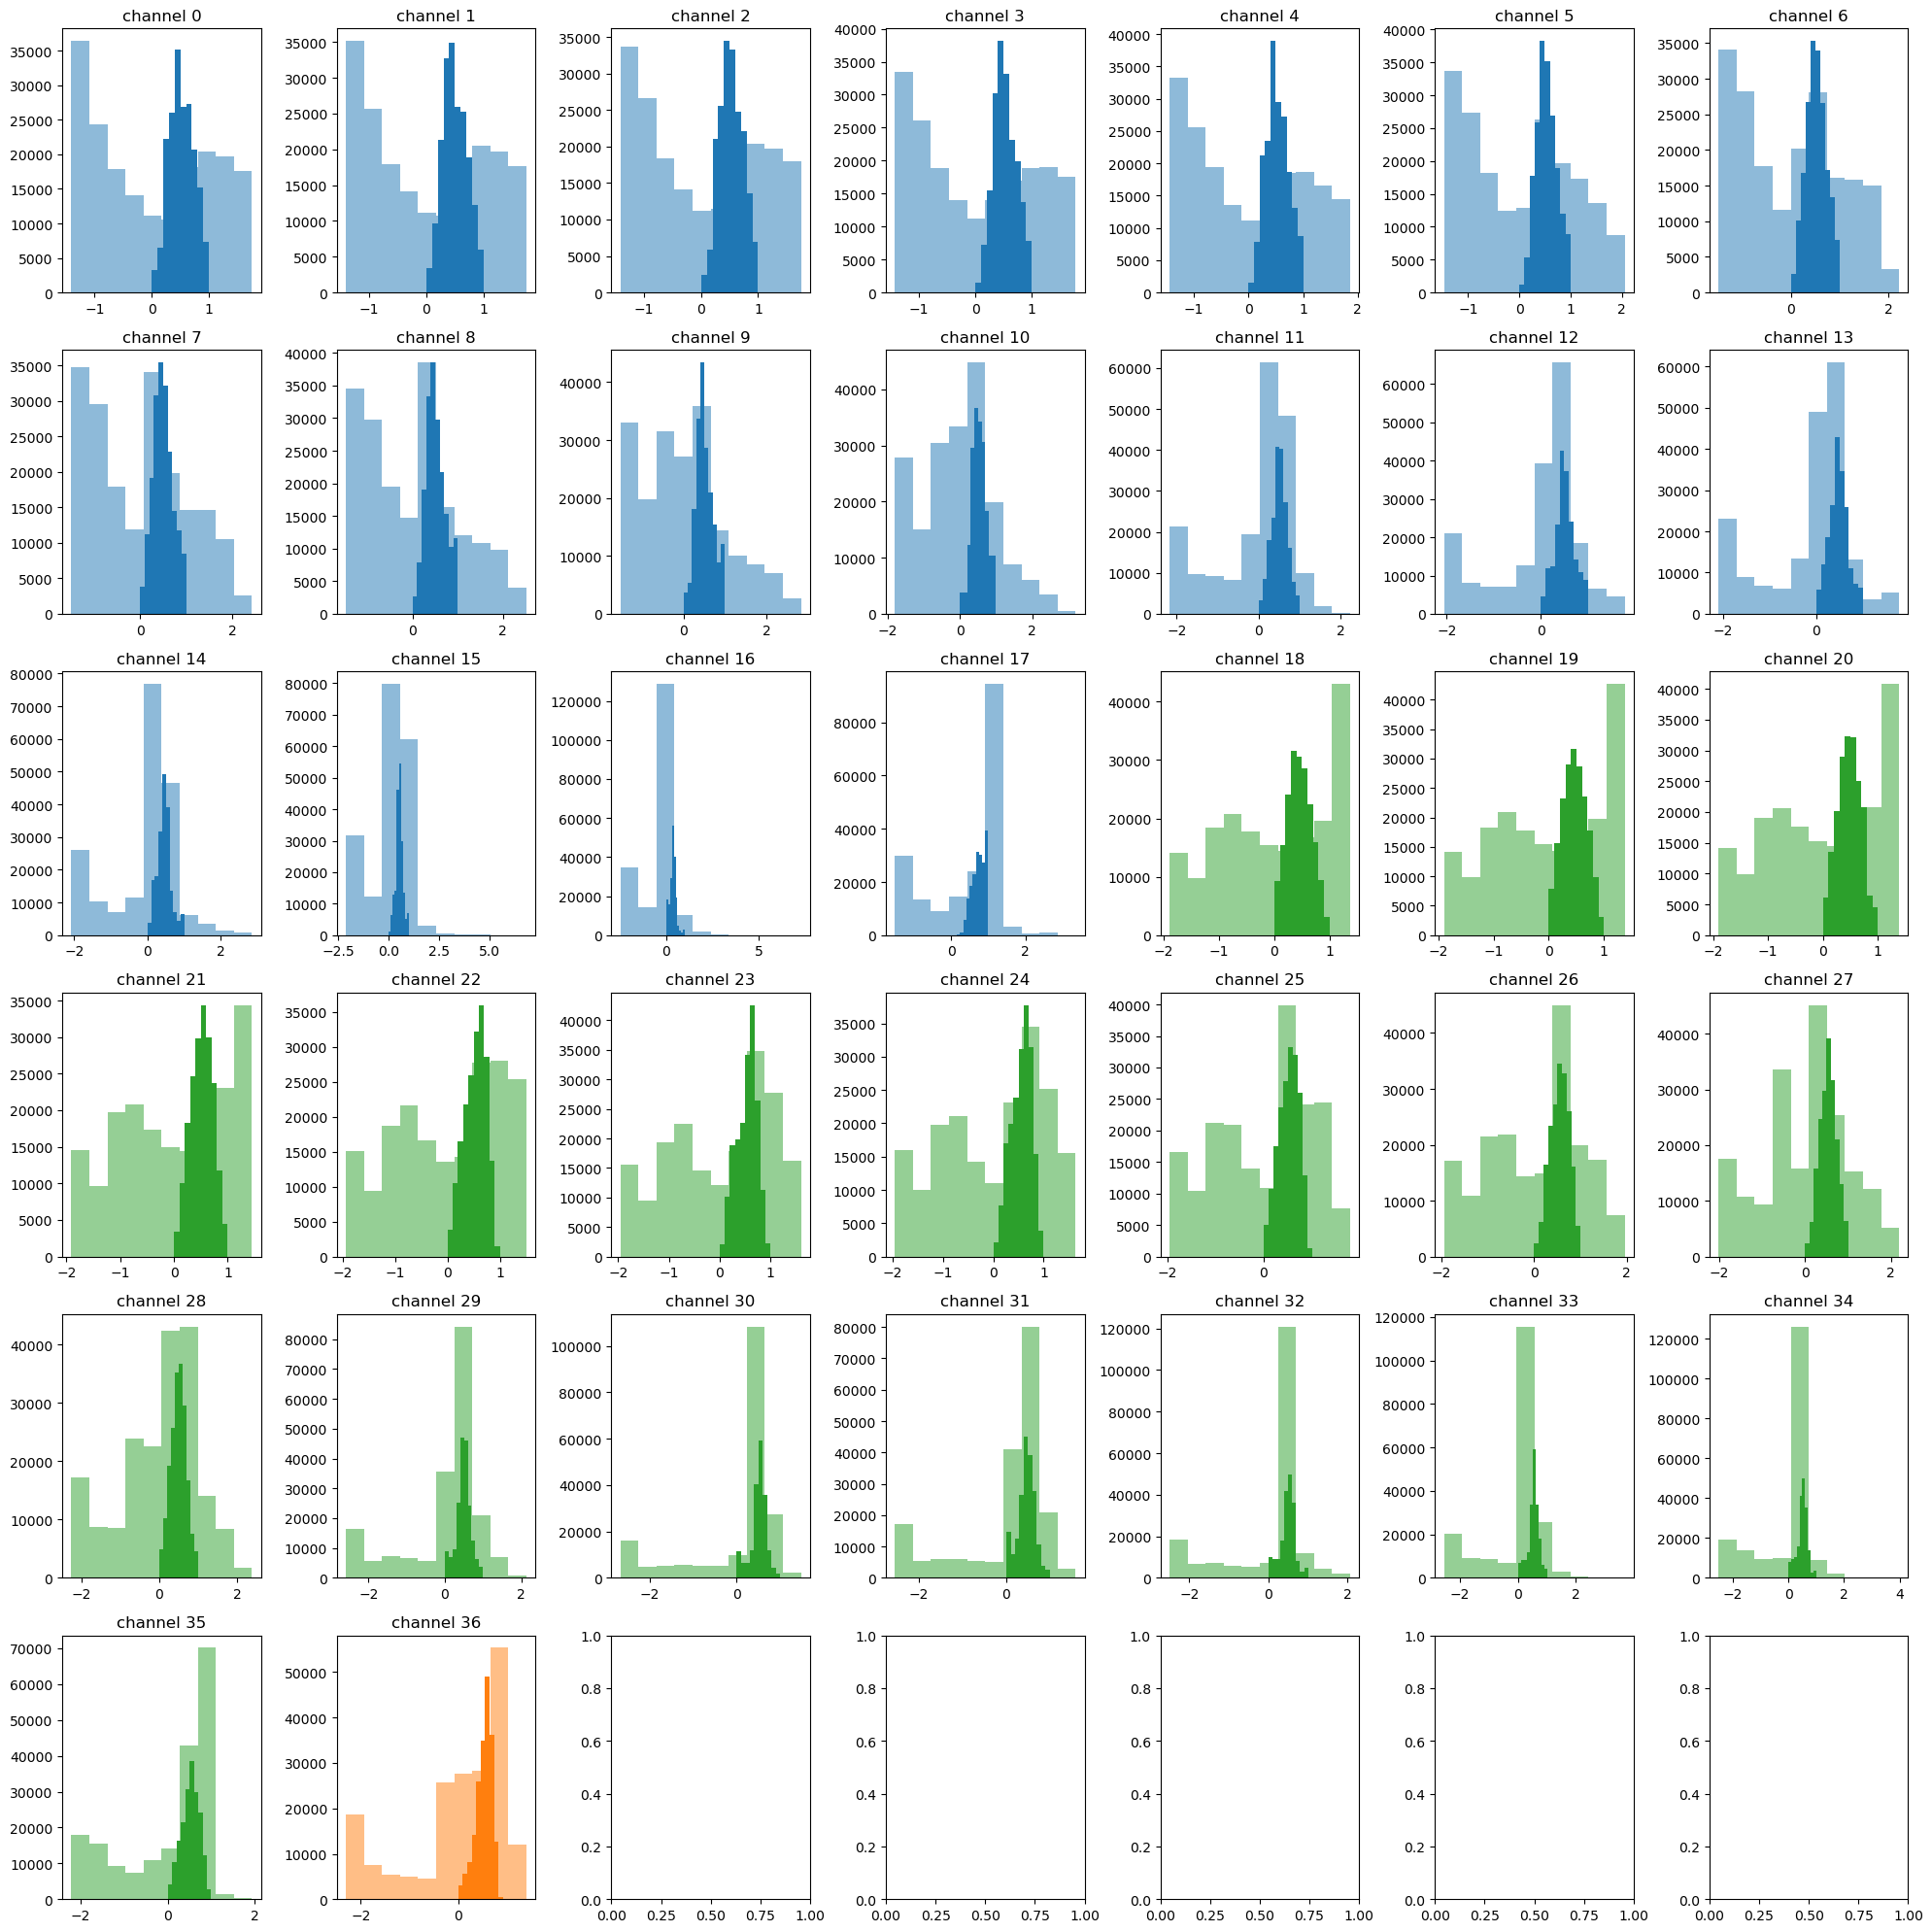

In [10]:
is_ = 6
js_ = 7

fig, axs = plt.subplots(is_, js_, figsize=(20, 20))
for i in range(is_):
    for j in range(js_):
        idx = i * js_ + j 
        if idx < np.shape(data_inf)[0]:
            if idx<=18 : color = "tab:blue"
            if idx>=18 and idx<36 : color = "tab:green"
            if idx==36 : color = "tab:orange"
            axs[i, j].hist(data_truth[idx],color=color,alpha=0.5) 
            axs[i, j].hist(data_inf[idx],color=color)
            axs[i, j].set_title(f'channel {idx}')
plt.tight_layout()
plt.show()

/tmp/ipykernel_2487572/2841622349.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(c, ax=axes[j, i])


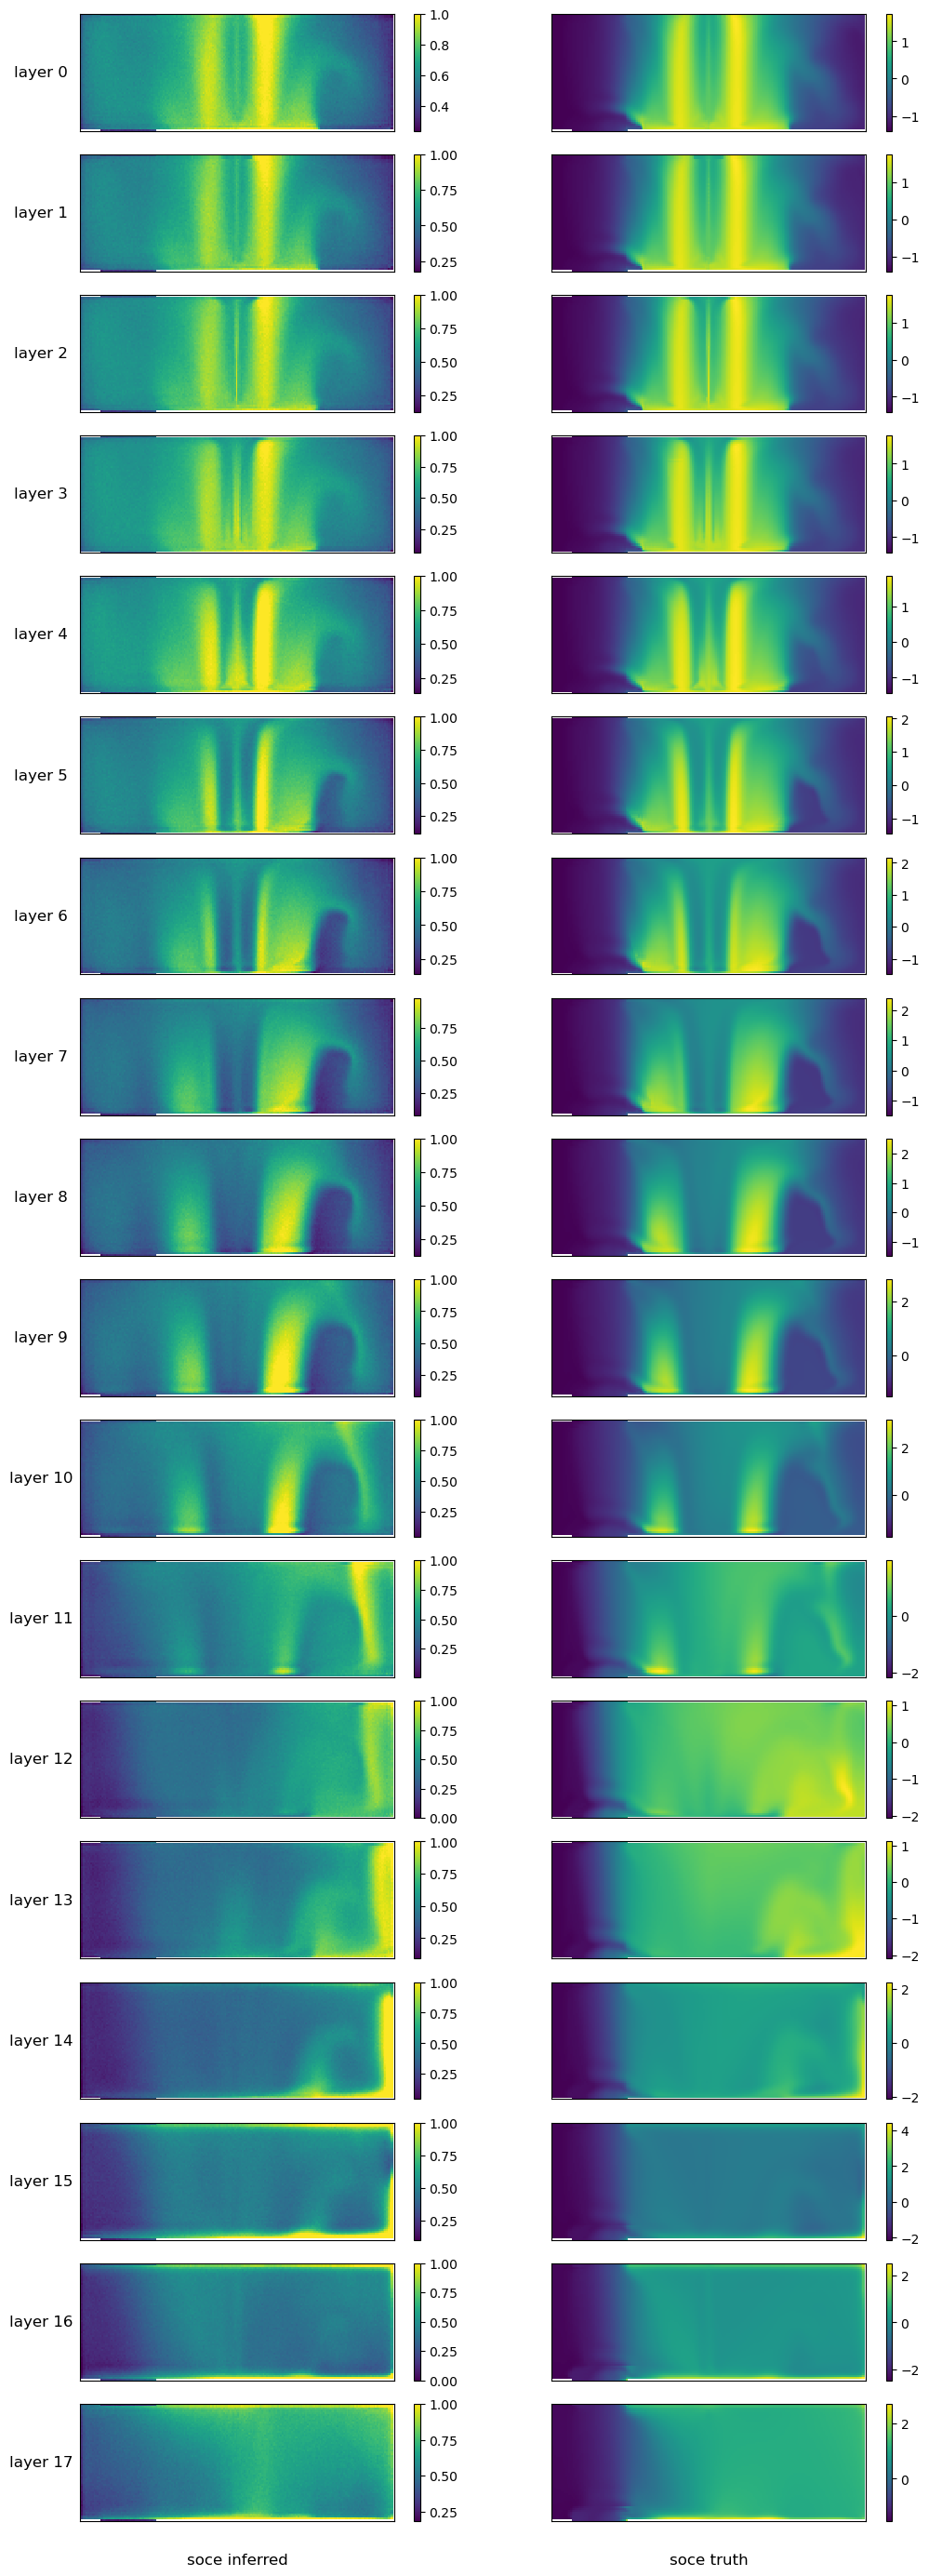

In [11]:
fig, axes = plt.subplots(18, 2, figsize=(12, 35))
var = [soce_inferred,soce_truth]
column_titles = ['soce inferred', 'soce truth']

for i in range(2):
    for j in range(18):
        c = axes[j, i].pcolor(var[i][0, :, :, j].T)
        fig.colorbar(c, ax=axes[j, i])
        axes[j, i].set_xticks([])
        axes[j, i].set_yticks([])
        if i == 0:
            axes[j, i].set_ylabel(f"layer {j}", rotation=0, size='large', labelpad=30, va='center')
        if j == 17:
            axes[j, i].set_xlabel(column_titles[i], rotation=0, size='large', labelpad=30, va='center')
plt.show()

/tmp/ipykernel_2487572/2247184012.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(c, ax=axes[j, i])


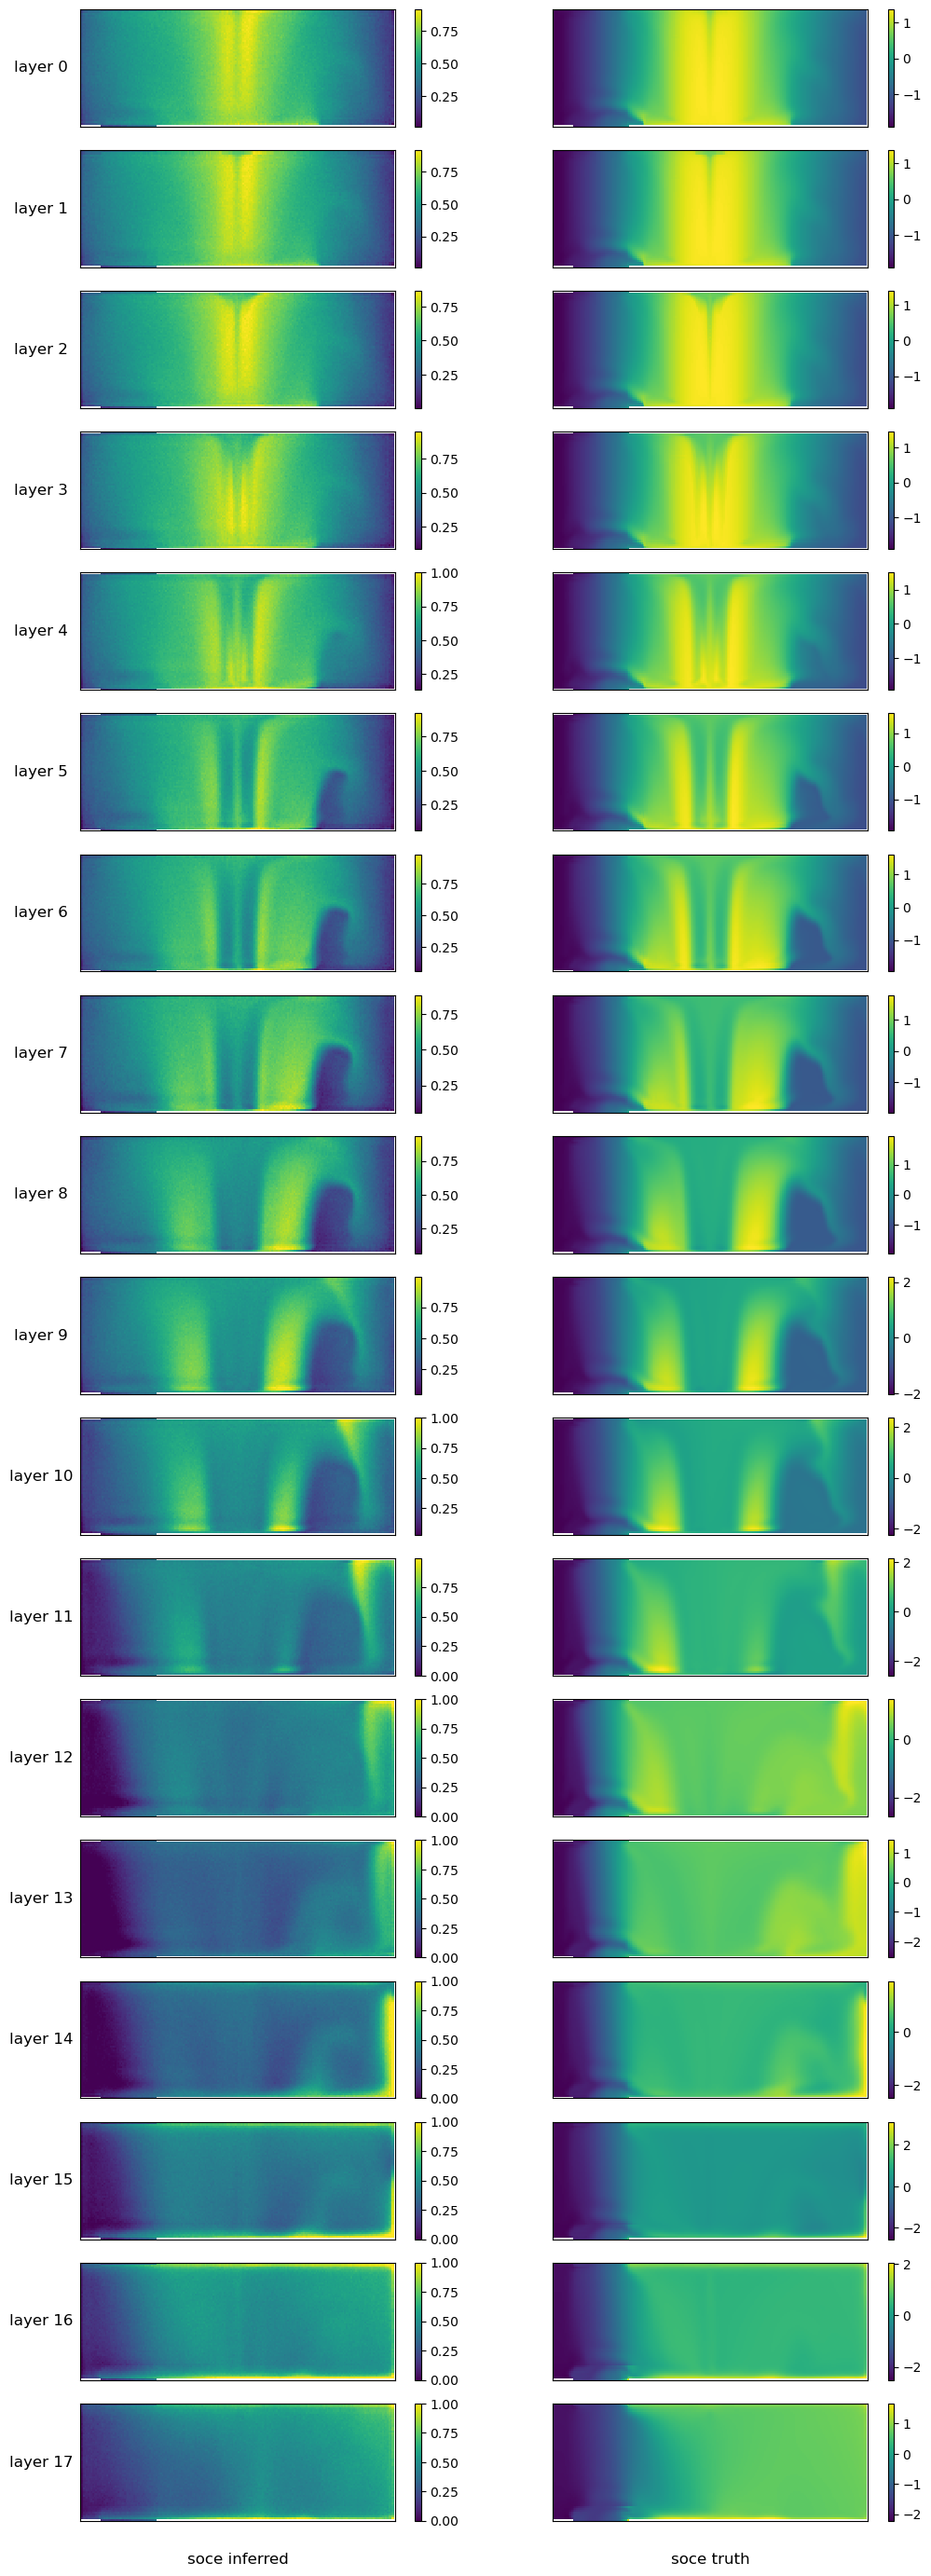

In [12]:
fig, axes = plt.subplots(18, 2, figsize=(12, 35))
var = [toce_inferred,toce_truth]
column_titles = ['soce inferred', 'soce truth']

for i in range(2):
    for j in range(18):
        c = axes[j, i].pcolor(var[i][0, :, :, j].T)
        fig.colorbar(c, ax=axes[j, i])
        axes[j, i].set_xticks([])
        axes[j, i].set_yticks([])
        if i == 0:
            axes[j, i].set_ylabel(f"layer {j}", rotation=0, size='large', labelpad=30, va='center')
        if j == 17:
            axes[j, i].set_xlabel(column_titles[i], rotation=0, size='large', labelpad=30, va='center')
plt.show()

/tmp/ipykernel_2487572/3517575719.py:4: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


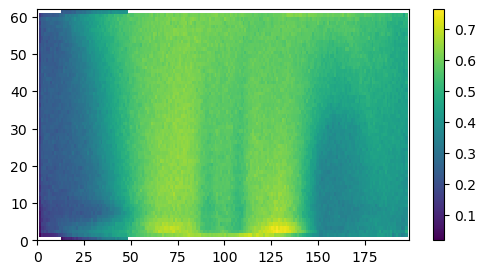

/tmp/ipykernel_2487572/3517575719.py:8: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


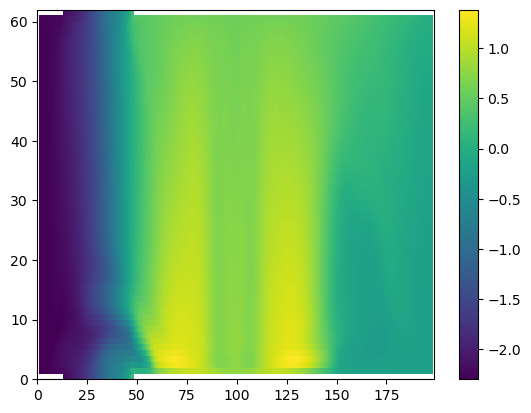

In [13]:
plt.figure(figsize=(6, 3))

plt.pcolor(ssh_inferred[0,:,:,0].T)
plt.colorbar()
plt.show()

plt.pcolor(ssh_truth[0,:,:,0].T)
plt.colorbar()
plt.show()